Using TensorFlow backend.


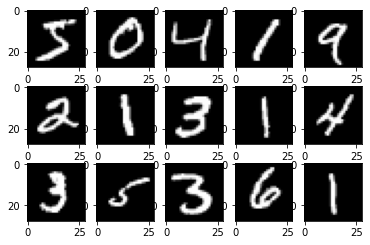

In [1]:
from keras.utils import np_utils
from src.models import *
from src.viz import *
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.callbacks import TensorBoard

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

visualize_mnist([x for x in range(15)])

def run_mnist(name, epochs=10, cnn=False):
    (x_train, y_train), (x_test, y_test) = load_data()
    # Set input shape and reshape dataset
    input_shape = (28, 28, 1)
    if cnn:
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')     
    else:
        num_pixels = x_train.shape[1] * x_train.shape[2]
        x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
        x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
    
    # Scale values from [0, 255] to [0, 1]
    x_train = x_train / 255
    x_test = x_test / 255
    
    # One-hot encode the target labels
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    # Build model
    model = create_model(name, input_shape, num_classes)
    print_model(model,f"img/{name}.png")
    
    # Train the model
    tensorboard = TensorBoard(log_dir=f'logs/{name}')
    callbacks = [tensorboard]
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=epochs, 
                        batch_size=200,
                        verbose=1,
                        callbacks=callbacks
                        )
    
    plot_history_metrics(history, ['accuracy', 'loss'])
    
    return history


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2784 - accuracy: 0.9207 - val_loss: 0.1358 - val_accuracy: 0.9600
Epoch 2/25
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1079 - accuracy: 0.9692 - val_loss: 0.0908 - val_accuracy: 0.9737
Epoch 3/25
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0700 - accuracy: 0.9798 - val_loss: 0.0804 - val_accuracy: 0.9754
Epoch 4/25
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0496 - accuracy: 0.9857 - val_loss: 0.0704 - val_accuracy: 0.9777
Epoch 5/25
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 6/25
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0265 - accuracy: 0.9927 - val_loss: 0.0593 - val_accuracy: 0.9809
Epoch 7/25
60000/60000 [==============================] 

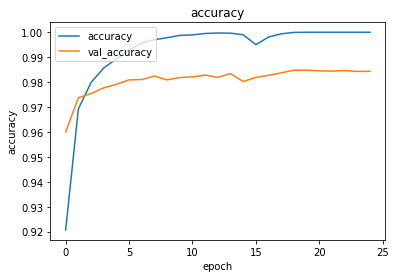

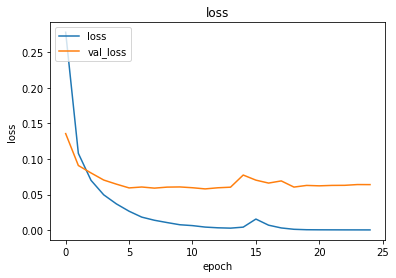

In [2]:
# MLP baseline
mlp_hist = run_mnist('mnist_mlp', epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2448 - accuracy: 0.9293 - val_loss: 0.0738 - val_accuracy: 0.9770
Epoch 2/25
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 3/25
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0409 - val_accuracy: 0.9858
Epoch 4/25
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0358 - val_accuracy: 0.9885
Epoch 5/25
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0347 - val_accuracy: 0.9881
Epoch 6/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0289 - val_accuracy: 0.9897
Epoch 7/25
60000/60000 [============================

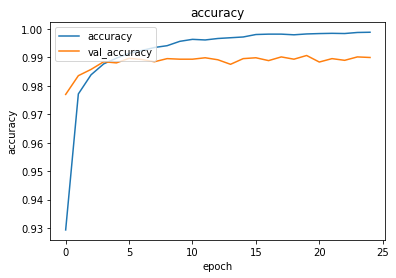

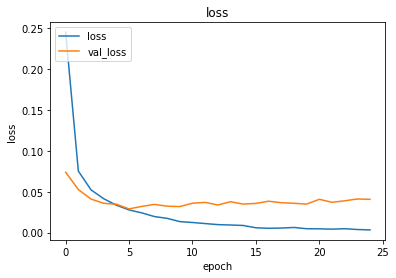

In [3]:
# CNN baseline
cnn1_hist = run_mnist('mnist_cnn_v1', cnn=True, epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3838 - accuracy: 0.8831 - val_loss: 0.0790 - val_accuracy: 0.9757
Epoch 2/25
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0972 - accuracy: 0.9704 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 3/25
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0702 - accuracy: 0.9791 - val_loss: 0.0394 - val_accuracy: 0.9874
Epoch 4/25
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 5/25
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0322 - val_accuracy: 0.9899
Epoch 6/25
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 7/25
60000/60000 [==============================]

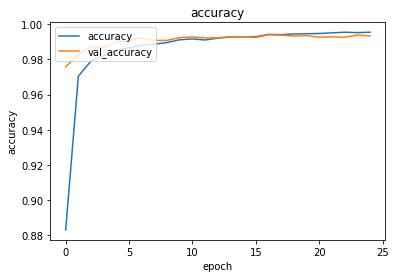

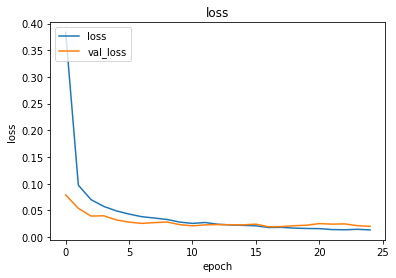

In [4]:
# A bit more complex CNN
cnn2_hist = run_mnist('mnist_cnn_v2', cnn=True, epochs=25)

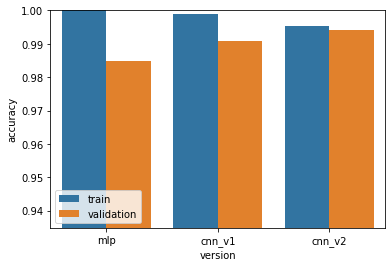

In [5]:
analyse_accuracy([mlp_hist, cnn1_hist, cnn2_hist], 
                 ['mlp', 'cnn_v1', 'cnn_v2'])
